<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Instructions</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Submission</a></span></li></ul></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span><ul class="toc-item"><li><span><a href="#Data-load" data-toc-modified-id="Data-load-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data load</a></span><ul class="toc-item"><li><span><a href="#Image-files" data-toc-modified-id="Image-files-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Image files</a></span></li><li><span><a href="#Files-paths" data-toc-modified-id="Files-paths-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Files paths</a></span></li><li><span><a href="#Undersampling" data-toc-modified-id="Undersampling-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Undersampling</a></span></li><li><span><a href="#Sample-impages" data-toc-modified-id="Sample-impages-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Sample impages</a></span></li><li><span><a href="#Loading-images" data-toc-modified-id="Loading-images-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Loading images</a></span></li><li><span><a href="#Flattening-data" data-toc-modified-id="Flattening-data-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Flattening data</a></span></li><li><span><a href="#Split-train,-test,-val" data-toc-modified-id="Split-train,-test,-val-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Split train, test, val</a></span></li></ul></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#Activation-RELU" data-toc-modified-id="Activation-RELU-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Activation RELU</a></span></li><li><span><a href="#NN-class" data-toc-modified-id="NN-class-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>NN class</a></span></li><li><span><a href="#Initialize-parameters" data-toc-modified-id="Initialize-parameters-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Initialize parameters</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Accuracy-assessment" data-toc-modified-id="Accuracy-assessment-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Accuracy assessment</a></span></li></ul></li></ul></div>

# Homework

## Intro

We're going to classify plant images into 4 different classes from a dataset of Soybean crops. Multi-class classification! We're moving up from simple binary classification tasks. This is a very lucrative area, agriculture is one of the last sectors to get disrupted with machine learning. A simple classifier is something many farmers are not aware of as even a possibility, thus the homework for this week is to learn some plant domain knowledge and use that to create a suitable plant classifier. 

## Instructions

Step 1 - Download the soybean dataset [here](https://www.kaggle.com/fpeccia/weed-detection-in-soybean-crops) 

Step 2 - Build a neural network using numpy (no libraries) , train it on the dataset, and show 2 examples of it testing on test crop images. This should all go inside of a jupyter notebook

***NOTE*** - If you find it too difficult to build  a neural network from scratch, then and only then, look at [this](https://www.kaggle.com/datduyn/2-layer-net-on-weeds-discriminant/)  example for inspiration. If you still find it too difficult, you can use a library like Tensorflow+Keras. Bonus points if you use OpenCV for data preprocessing in someway!

## Submission

Submit your github link to gradedhomeworkassignments@gmail.com with "Week 7" as the title of your email. The deadline is 2 weeks from assignment.

# Libraries

In [3]:
import os
import sys
from pathlib import Path
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

import cv2
import glob

import matplotlib.pyplot as plt 
%matplotlib inline

## Data load

### Image files

In [4]:
data_dir = r'D:/04_Jupyter/HW_07/dataset/'

In [5]:
fig_cnt = sum([len(files) for root, dirs, files in os.walk(data_dir)])
print('Total number of files:', fig_cnt)
print('\nCounts by folder:')
for root, dirs, files in os.walk(data_dir):
    for d in dirs:
        s=str(d)+': '+str(sum([len(fi) for ro, di, fi in os.walk(data_dir+d+'/')]))
        print(s)
            

Total number of files: 15336

Counts by folder:
broadleaf: 1191
grass: 3520
soil: 3249
soybean: 7376


### Files paths

In [6]:
classes = ['broadleaf', 'grass', 'soil', 'soybean']
all_files_paths=[]
files_to_load_per_class=4
files_to_load =files_to_load_per_class*len(classes)

for i, i_val in enumerate(classes):
    cls_dir=Path(data_dir+str(i_val)+'/')
    for img in cls_dir.glob('*.tif'):
        all_files_paths.append((str(img),i,i_val))

# all paths
x_labels=pd.DataFrame(all_files_paths, columns=['img_path', 'class_ind', 'class_name'],index=None)    


print('\nShape:',x_labels.shape)
display(x_labels.groupby(['class_name','class_ind']).count())
display(x_labels.head(3))



Shape: (15336, 3)


,,img_path
class_name,class_ind,
broadleaf,0,1191
grass,1,3520
soil,2,3249
soybean,3,7376


,img_path,class_ind,class_name
0,D:\04_Jupyter\HW_07\dataset\broadleaf\1.tif,0,broadleaf
1,D:\04_Jupyter\HW_07\dataset\broadleaf\10.tif,0,broadleaf
2,D:\04_Jupyter\HW_07\dataset\broadleaf\100.tif,0,broadleaf


### Undersampling 
Equalizing the size of classes to the size of 'broadleaf' class.

In [7]:
class_1_cnt = len(x_labels.loc[x_labels.class_ind==0])
x_labels_under = pd.concat([x_labels.loc[x_labels.class_ind==0], 
                            x_labels.loc[x_labels.class_ind==1].sample(n=class_1_cnt, random_state=8).reset_index(drop=True),
                            x_labels.loc[x_labels.class_ind==2].sample(n=class_1_cnt, random_state=8).reset_index(drop=True),
                            x_labels.loc[x_labels.class_ind==3].sample(n=class_1_cnt, random_state=8).reset_index(drop=True)])

display(x_labels_under.groupby(['class_name','class_ind']).count())

,,img_path
class_name,class_ind,
broadleaf,0,1191
grass,1,1191
soil,2,1191
soybean,3,1191


### Sample impages

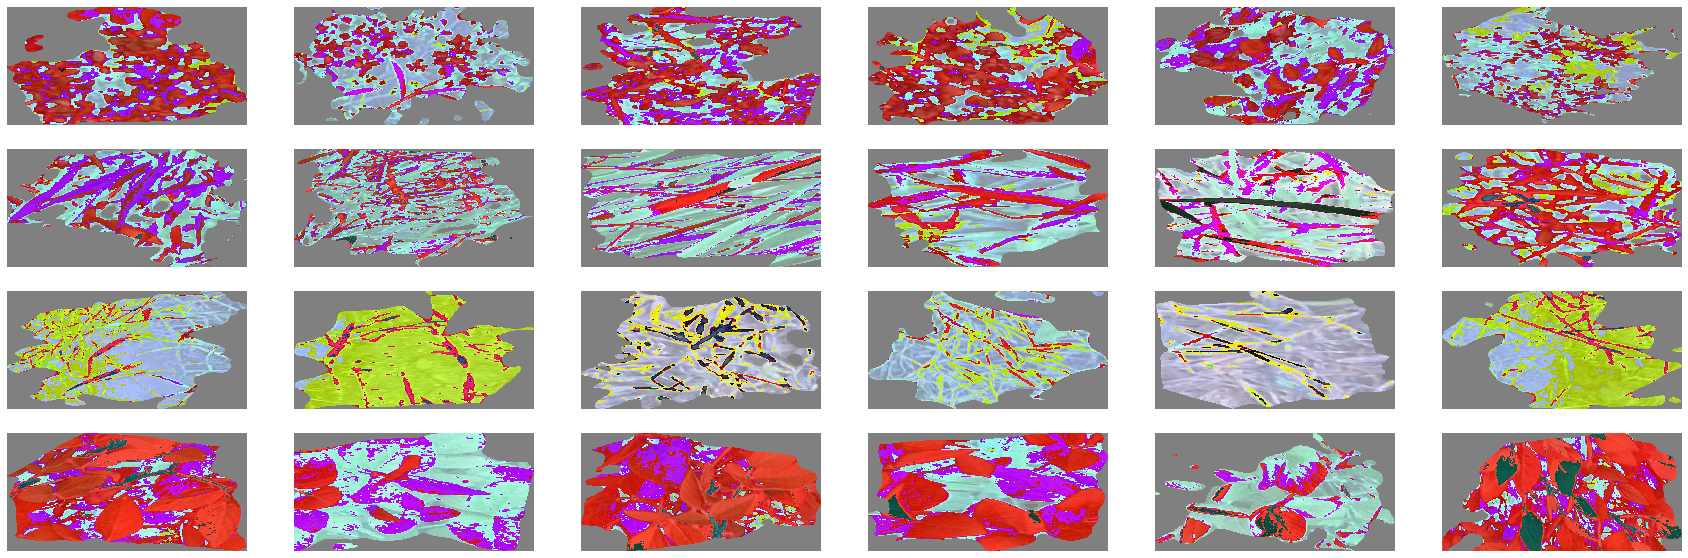

In [8]:
img_0=(x_labels_under[x_labels_under['class_ind']==0]['img_path'].iloc[:6]).tolist()
img_1=(x_labels_under[x_labels_under['class_ind']==1]['img_path'].iloc[:6]).tolist()
img_2=(x_labels_under[x_labels_under['class_ind']==2]['img_path'].iloc[:6]).tolist()
img_3=(x_labels_under[x_labels_under['class_ind']==3]['img_path'].iloc[:6]).tolist()

fig, ax = plt.subplots(4,6, figsize=(30,10))
for i in range(6):
        img_0_file=cv2.imread(str(img_0[i]))
        img_1_file=cv2.imread(str(img_1[i]))    
        img_2_file=cv2.imread(str(img_2[i]))
        img_3_file=cv2.imread(str(img_3[i])) 
        
        ax[0, i].imshow(img_0_file-128)
        ax[0, i].axis('off')
        ax[0, i].set_aspect('auto')
        
        ax[1, i].imshow(img_1_file-128)
        ax[1, i].axis('off')
        ax[1, i].set_aspect('auto')
        
        ax[2, i].imshow(img_2_file-128)
        ax[2, i].axis('off')
        ax[2, i].set_aspect('auto')
        
        ax[3, i].imshow(img_3_file-128)
        ax[3, i].axis('off')
        ax[3, i].set_aspect('auto')        


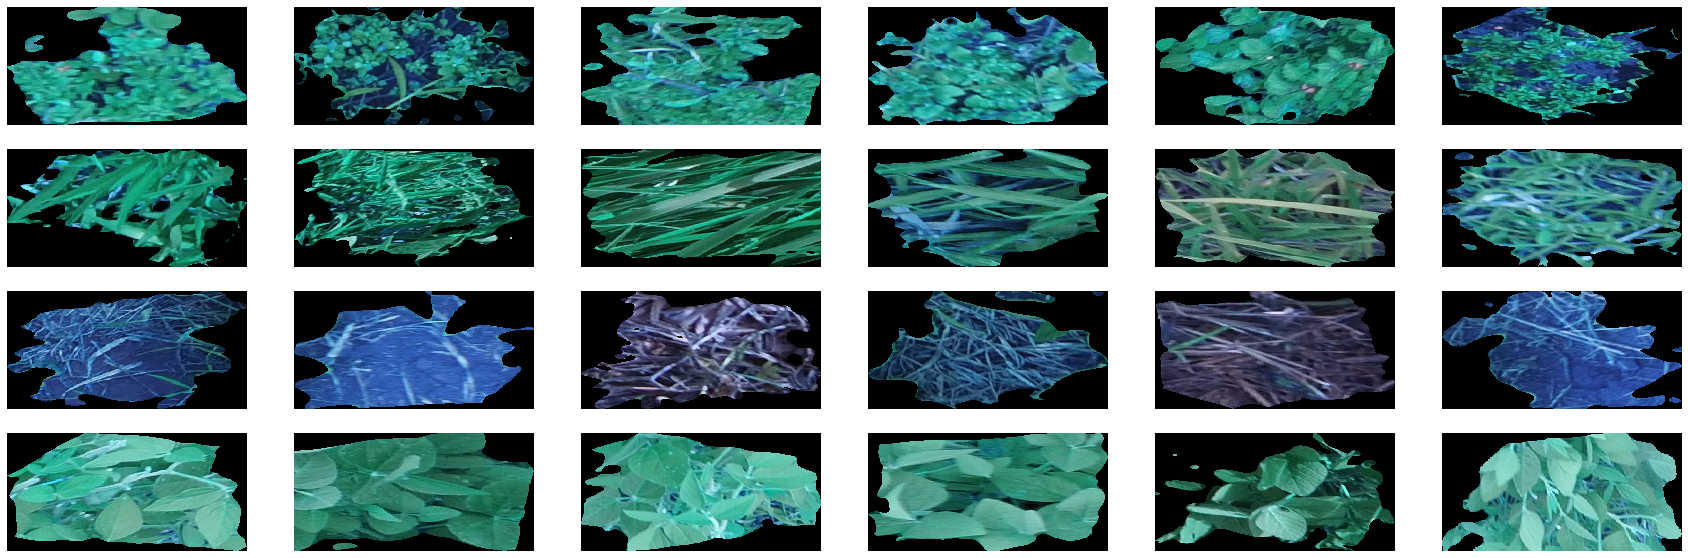

In [11]:
fig, ax = plt.subplots(4,6, figsize=(30,10))
for i in range(6):
        img_0_file=cv2.imread(str(img_0[i]))
        img_1_file=cv2.imread(str(img_1[i]))    
        img_2_file=cv2.imread(str(img_2[i]))
        img_3_file=cv2.imread(str(img_3[i])) 
    
        ax[0, i].imshow(img_0_file.astype(np.float32)/255)
        ax[0, i].axis('off')
        ax[0, i].set_aspect('auto')
        
        ax[1, i].imshow(img_1_file.astype(np.float32)/255)
        ax[1, i].axis('off')
        ax[1, i].set_aspect('auto')
        
        ax[2, i].imshow(img_2_file.astype(np.float32)/255)
        ax[2, i].axis('off')
        ax[2, i].set_aspect('auto')
        
        ax[3, i].imshow(img_3_file.astype(np.float32)/255)
        ax[3, i].axis('off')
        ax[3, i].set_aspect('auto')   

### Loading images

In [12]:
x_data=[]
x_labels=[]
label=0
i=0
j=0

for path in x_labels_under.img_path[:]:
    i=i+1
    #display(i)
   
    img = cv2.imread(str(path))
    img = cv2.resize(img, (200,200))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.  #scaling pixel values to range (0,1) - for better performance of model
    label =  x_labels_under[x_labels_under.img_path==path].values[0,1]
    x_data.append(img)
    x_labels.append(label)

    if i%250==0:
        print(i)
         
x_data=np.asarray(x_data)
x_labels=np.asarray(x_labels)

print('shape of data:',x_data.shape)
print('shape of labels:',x_labels.shape)

250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
shape of data: (4764, 200, 200, 3)
shape of labels: (4764,)


### Flattening data

In [13]:
# flattening the sample
x_data_f=np.reshape(x_data, (x_data.shape[0], -1)).astype('float64')
x_data_f.shape

(4764, 120000)

### Split train, test, val

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data_f, x_labels, test_size=0.16, random_state=100, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.30, random_state=100, shuffle=True)    
    
print('Train: ', x_train.shape)
print('Test: ',x_test.shape)
print('Validation: ',x_val.shape)


Train:  (4001, 120000)
Test:  (534, 120000)
Validation:  (229, 120000)


In [15]:
del x_data, x_data_f

# Neural Network

## Activation RELU

In [16]:
relu = lambda x:np.maximum(0,x)

## NN class

In [17]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size, std= 0.001):

        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y = None, reg=0.0):

        #unpack
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        layer1 = relu(X.dot(W1) + b1)  #(N,D) x (D,H) = (N,H)
        scores = layer1.dot(W2) + b2

        #if target is not given then jump out 
        if(y is None): 
            return scores

        scores = np.exp(scores-scores.max())
        scores_sumexp = np.sum(scores, axis=1)#stack vertically

        ##Nomalize all scores
        softmax = scores / scores_sumexp.reshape(N,1)  #Shape: (N, C)

        #total loss of all training. -log of all correct score
        loss =  (-1.0) * np.sum(np.log(softmax[range(N),y]))

        ##Normalize the loss and add regularization strength 
        loss /= N 
        loss += reg * np.sum(W1 * W1) 
        loss += reg * np.sum(W2 * W2) 

        #Backward pass on the net 
        grads = {}

        correct_class_scores = scores[range(N), y]
        softmax[range(N), y] = (-1.0) * (scores_sumexp - correct_class_scores)/scores_sumexp
        softmax /= N

        grads['W2'] = layer1.T.dot(softmax)
        grads['b2'] = np.sum(softmax, axis=0)
        grads['W2'] += reg * 2 * W2

        hidden = softmax.dot(W2.T)

        hidden[layer1 == 0] = 0 

        grads['W1'] = X.T.dot(hidden) 
        grads['b1'] = np.sum(hidden, axis=0) 
        grads['W1'] += reg * 2 * W1

        return loss, grads
    def train(self, X, y, X_val, y_val, 
                learning_rate =0.001, learning_rate_decay=0.95, 
                reg=0.000005, num_iters=100, 
                batch_size=200, it_verbose = 1, verbose=False):

        N, D = X.shape
        N_val = X_val.shape[0]
        iteration_per_epoch = max(N/batch_size, 1)

        loss_hist = []
        train_acc_hist = []
        val_acc_hist = []

        for it in range(num_iters):
            sampling = np.random.choice(np.arange(N), batch_size, replace=False) 
            X_batch = X[sampling]
            y_batch = y[sampling]

            #compute loss and gradients
            loss, grads = self.loss( X_batch, y=y_batch, reg=reg)
            loss_hist.append(loss) 

            #Update rule 
            self.params['W1'] += (-1.0) * learning_rate * grads['W1']
            self.params['b1'] += (-1.0) * learning_rate * grads['b1']
            self.params['W2'] += (-1.0) * learning_rate * grads['W2']
            self.params['b2'] += (-1.0) * learning_rate * grads['b2']

            if (verbose and it%it_verbose==0):
                # Check accuracy
                train_acc = (self.predict( X_batch) == y_batch).astype(np.int).mean()
                val_acc = (self.predict( X_val) == y_val).astype(np.int).mean()
                train_acc_hist.append(train_acc)
                val_acc_hist.append(val_acc)
                print('iteration: %d / %d | Loss: %f | Accuracy: %f' % (it, num_iters, loss, train_acc)) 
                
                # Decay learning rate
                learning_rate *= learning_rate_decay
        return {
                'loss_hist':loss_hist,
                'train_acc_hist':train_acc_hist,
                'val_acc_hist':val_acc_hist
            }
    
    def predict(self, X):

        y_pred = None
        #relu = lambda x:np.maximum(0,x)
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        #Forward propagation though the network 
        layer1 = relu(X.dot(W1) + b1)
        scores = layer1.dot(W2) + b2 #shape: (N x C)
        y_pred = np.argmax(scores, axis=1)

        return y_pred

## Initialize parameters

In [18]:
input_size=x_train.shape[1]
hidden_size=300
output_size=len(classes)
std=0.01

## Train

In [21]:
net = TwoLayerNet(input_size, hidden_size,output_size,std )
stats = net.train(x_train, y_train, x_test, y_test, 
            learning_rate =0.003, learning_rate_decay=0.97, 
            reg=0.0, num_iters=600, 
            batch_size=100, it_verbose = 25,verbose=True)

iteration: 0 / 600 | Loss: 1.394802 | Accuracy: 0.320000
iteration: 25 / 600 | Loss: 1.285858 | Accuracy: 0.590000
iteration: 50 / 600 | Loss: 1.193331 | Accuracy: 0.650000
iteration: 75 / 600 | Loss: 1.018810 | Accuracy: 0.720000
iteration: 100 / 600 | Loss: 0.938712 | Accuracy: 0.620000
iteration: 125 / 600 | Loss: 0.867073 | Accuracy: 0.650000
iteration: 150 / 600 | Loss: 0.842560 | Accuracy: 0.640000
iteration: 175 / 600 | Loss: 0.799138 | Accuracy: 0.650000
iteration: 200 / 600 | Loss: 0.835094 | Accuracy: 0.640000
iteration: 225 / 600 | Loss: 0.770525 | Accuracy: 0.680000
iteration: 250 / 600 | Loss: 0.738222 | Accuracy: 0.680000
iteration: 275 / 600 | Loss: 0.711500 | Accuracy: 0.690000
iteration: 300 / 600 | Loss: 0.737929 | Accuracy: 0.700000
iteration: 325 / 600 | Loss: 0.765518 | Accuracy: 0.620000
iteration: 350 / 600 | Loss: 0.675674 | Accuracy: 0.670000
iteration: 375 / 600 | Loss: 0.713620 | Accuracy: 0.730000
iteration: 400 / 600 | Loss: 0.681181 | Accuracy: 0.700000
it

## Accuracy assessment

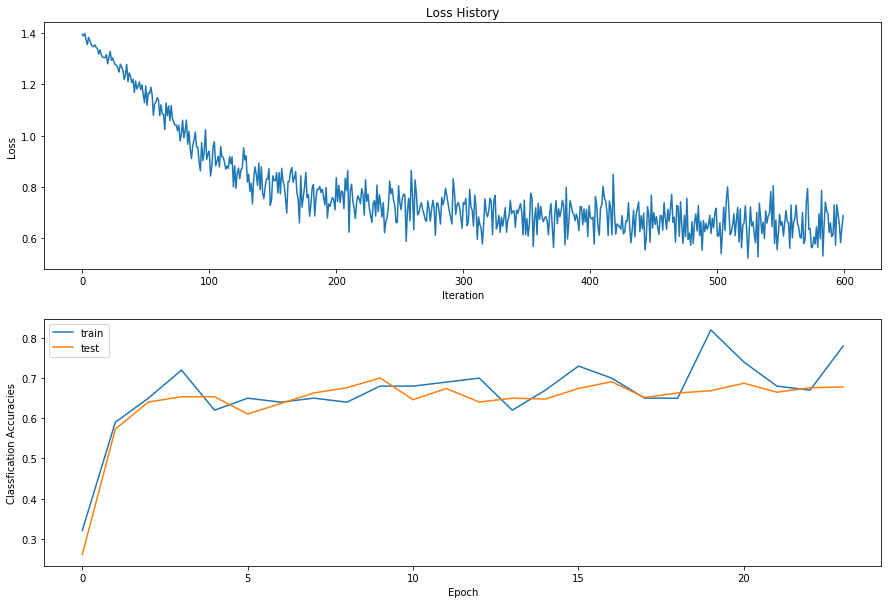

In [22]:
# plot loss history and train/ validation accuracies history
plt.rcParams['figure.figsize'] = (15.0, 10.0) 
plt.subplot(2,1,1) 
plt.plot(stats['loss_hist'])
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(stats['train_acc_hist'], label='train')
plt.plot(stats['val_acc_hist'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Classfication Accuracies')
plt.legend()
plt.show()